### **New York City Airbnb**

[NYC Airbnb Data Source](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

`Context`

Airbnb is an online platform that primarily offers accommodation rental services, where the interaction occurs between the host *(host)* and prospective tenants. At the same time, Airbnb is only a third party, like a marketplace in general. Airbnb has been operating since 2008 and has operations in 191+ countries. According to the [New York City planning](https://www1.nyc.gov/site/planning/planning-level/nyc-population/population-facts.page) web page, New York City is the city with the largest population in The United States. Therefore, of course, New York City has also contributed to the growth of Airbnb's business, where many tourists travel to New York City and need lodging.

It is super easy to become an Airbnb host. We only need to create an account on the Airbnb webpage and select the option as 'host'. Then, the host can insert a list of their properties along with their rental prices. However, Airbnb's business model allows hosts to set the rental fee for their property, which can be pretty tricky for hosts. If the price is too high compared to other properties with similar features around the area, few will rent the property.

On the other hand, if it is too cheap, the host will not get a reasonable profit. Keep in mind that many factors affect the value of a property. Thus, those factors need to be understood by the host because it is related to the profit that can be earned.

`Problem Statement`

One of the biggest challenges for companies like Airbnb is solving the problem of having a business model that is financially profitable for property owners and can provide a positive experience for property tenants.

Since Airbnb offers complete freedom for hosts to price their property, they provide only minimal clues that allow hosts to compare similar places in their neighborhood for competitive prices. Hosts can also set a higher price for any additional amenities. **Therefore, with an increasing number of Airbnb hosts, it's crucial to find the right price to stay competitive in the host's neighborhood**.


`Goals`

Based on the problem statement, Airbnb certainly needs to have a 'tool' that can predict and help their clients (in this case, hosts) to able to **determine the fair rental price for each new property they are going to rent**. The differences in the various features found in a property, such as the number of rooms, location, and property type, can increase the accuracy of rental price predictions, which can bring profit for the host, and of course, be affordable for the tenant.

For Airbnb, a predictive tool that can provide fair price predictions can increase the number of hosts and listings. In other words, more hosts and listings mean that the company's revenue can increase. In this context, the revenue is obtained from 'booking charges' from both hosts and guests.


`Analytic Approach`

We need to analyze the data to find patterns of the existing features that distinguish one property from another. We will build a regression model to help companies provide a rental price prediction tool for newly listed accommodations on Airbnb, which will be helpful for hosts in determining their listing rental prices.

`Metrics Evaluation`

The evaluation metrics that will be used are RMSE, MAE, and MAPE. RMSE is the mean value of the square root of the error, MAE is the mean absolute value of the error, whereas MAPE is the average percentage error generated by the regression model. The smaller the RMSE, MAE, and MAPE values, the more accurate the model is in predicting the rental price according to the features' limitations.

In addition, we can also use the value of R-squared or adj. R-squared if the model selected as the final model is a linear one. The R-squared value is used to determine how well the model can represent the overall variance of the data. The closer the value to 1, the more fit the model is to the observation data. However, this metric is not valid for non-linear models.


### **Data Understanding**

- The dataset is Airbnb listing data in New York City in 2019.
- Each row of data represents information regarding the property and its owner.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| id | Integer | Listing ID |
| name | Object | Name of the listing |
| host_id | Integer | Host ID |
| host_name | Object | Name of the host |
| neighbourhood_group | Object | Location |
| neighbourhood | Object | Area |
| latitude | Float | Latitude coordinates |
| longitude | Float | Longitude coordinates |
| room_type | Object | Listing space type |
| price | Integer | Price in dollars |
| minimum_nights | Integer | Amount of nights minimum |
| number_of_reviews | Integer | Number of reviews |
| last_review | Object | Latest review |
| reviews_per_month | Float | Number of reviews per month |
| calculated_host_listings_count | Integer | Amount of listing per host |
| availability_365 | Integer | Number of days when listing is available for booking |

<br>

In [1]:
# Import libraries for exploring dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To hide warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### **Exploratory Data Analysis**

**Distribution of NYC Airbnb price**

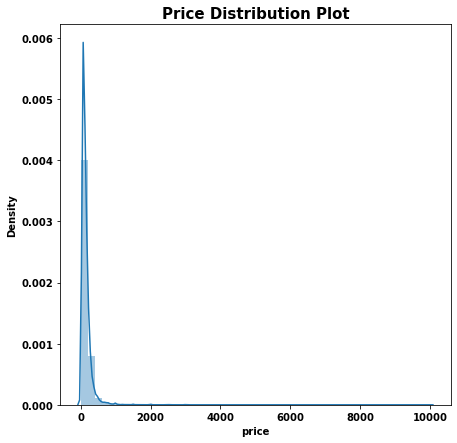

In [3]:
# The distribution plot of 'price' feature
plt.figure(figsize=(7, 7))
sns.distplot(df['price'])
plt.title('Price Distribution Plot', size=15, weight='bold');

According to the distribution plot of price above, we can see that the distribution is right-skewed (positive skewness).

**Types of property related to price**

In [4]:
# Check the number of properties based on neighbourhood group and type
print(f"The number of properties in each neighbourhood group:\n{df['neighbourhood_group'].value_counts()}")
print(f"\nThe number of properties based on the type:\n{df['room_type'].value_counts()}")

The number of properties in each neighbourhood group:
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

The number of properties based on the type:
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


Most properties are located in Manhattan and Brooklyn with the type of property that is rented out is dominated by private rooms and entire home/apt.

In [5]:
# Grouping type of property based on neighbourhood group
df.groupby(['neighbourhood_group', 'room_type'])['room_type'].count()

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: room_type, dtype: int64

In [6]:
# Check the median price of each neighborhood group
df_median_price = df.groupby(by=['neighbourhood_group']).agg({'price':'median'}).reset_index()
df_median_price = df_median_price.set_index('neighbourhood_group')
df_median_price = df_median_price.sort_values('price', ascending=False)
df_median_price.head()

,price
neighbourhood_group,
Manhattan,150.0
Brooklyn,90.0
Queens,75.0
Staten Island,75.0
Bronx,65.0


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,100.0,53.5,40.0
Brooklyn,145.0,65.0,36.0
Manhattan,191.0,90.0,69.0
Queens,120.0,60.0,37.0
Staten Island,100.0,50.0,30.0


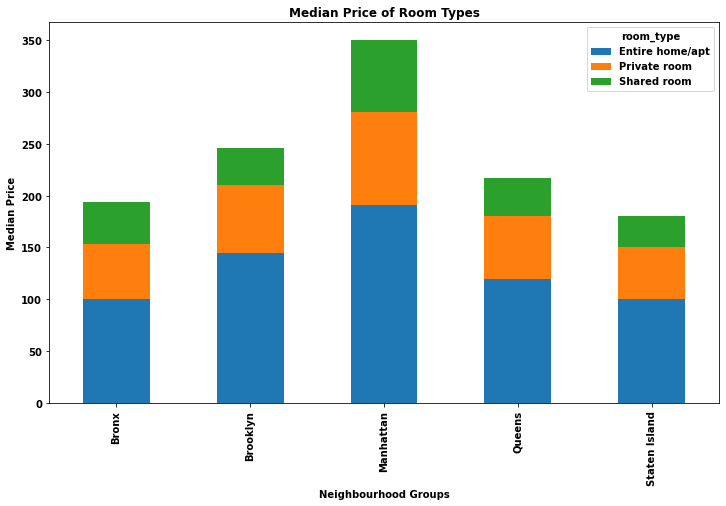

In [7]:
# The plot of the median price of each property type in each neighborhood group
from IPython.display import display

neighbour_pivot = df.pivot_table(index='neighbourhood_group', columns='room_type', values='price', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Neighbourhood Groups')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Room Types');

The Manhattan area has the highest median price for each room type, with an entire home/apt median twice the median price of a private room, around $200.

As known previously, Queens has the highest average review rating. However, the median Airbnb price in Queens is even far below Manhattan, which has the lowest monthly average review.


**Location**

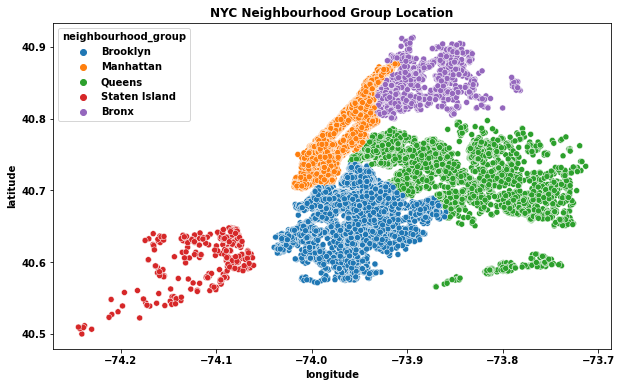

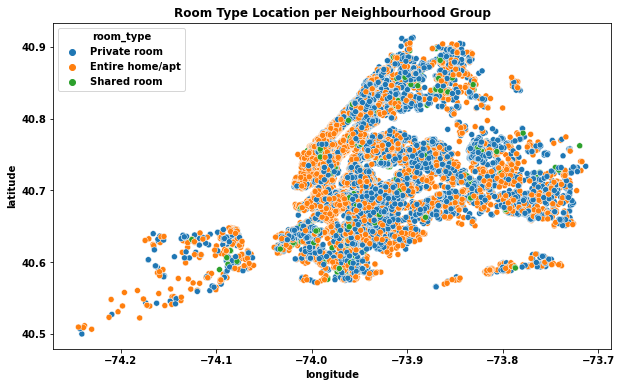

In [8]:
# The plot of 'neighbourhood_group' location
plt.figure(figsize=(10, 6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['neighbourhood_group']).set_title('NYC Neighbourhood Group Location')

# The plot of 'room_type' distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['room_type']).set_title('Room Type Location per Neighbourhood Group');

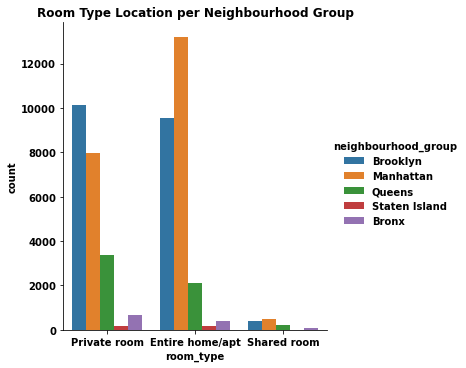

In [9]:
# The distribution of room type per neighbourhood group
sns.catplot(x='room_type', kind='count', hue='neighbourhood_group', data=df);
plt.title('Room Type Location per Neighbourhood Group');

Most property types are entire home/apt and located in Manhattan, while most private room property types are located in Brooklyn. Those things indicate the preferences of tenants, who prefer private rooms or entire homes/apt rather than shared rooms.

**Availability**

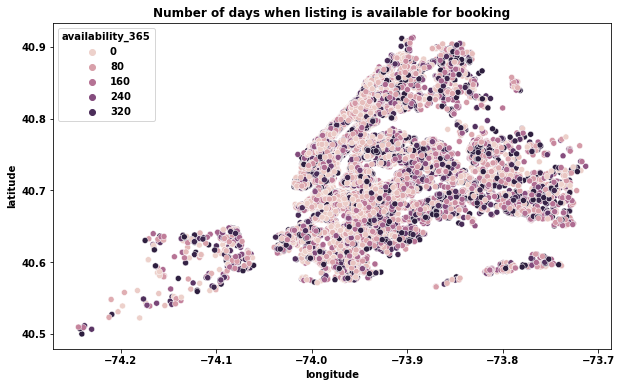

In [10]:
# The distribution of 'availability_365' feature
plt.figure(figsize=(10,6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['availability_365']).set_title('Number of days when listing is available for booking');

It can be seen that the number of days available for booking in Brooklyn is fewer than in other neighborhoods. This might be related to the vast number of private rooms rented in Brooklyn.

### **Data Preprocessing**

In this step, we will do data cleaning to produce clean data that will be used in the following analysis steps. Several points that need to be done are:

- Drop features that are irrelevant to the problem and objective.
- Give treatment to missing values (if any). It can be done by dropping the feature if unnecessary or imputing with the reasonable values regarding the case.

For data preprocessing and feature engineering, we will use a duplicate DataFrame of the previous DataFrame.

In [11]:
# Create a duplicate DataFrame
df_model = df.copy()

In [12]:
# Check more detailed info on each feature
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,id,int64,0,0.00,48895,"[19073356, 21123576]"
1,name,object,16,0.03,47905,[Huge One Bedroom Haven In The Heart Of Manhat...
2,host_id,int64,0,0.00,37457,"[51680319, 42619297]"
3,host_name,object,21,0.04,11452,"[Gaël-Etienne, Aigerim Aika]"
4,neighbourhood_group,object,0,0.00,5,"[Manhattan, Queens]"
5,neighbourhood,object,0,0.00,221,"[Prince's Bay, Far Rockaway]"
6,latitude,float64,0,0.00,19048,"[40.76433, 40.73787]"
7,longitude,float64,0,0.00,14718,"[-73.91321, -73.85255]"
8,room_type,object,0,0.00,3,"[Entire home/apt, Private room]"
9,price,int64,0,0.00,674,"[2103, 39]"


According to the information above, there are missing values in some features. Next, we need to observe further the missing values to pick an appropriate treatment to solve the missing value problem.

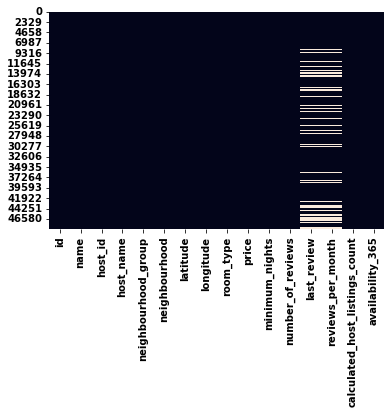

In [13]:
# Missing values heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Four features have missing values. The 'last_review' and 'reviews_per_month' features have the same number of missing values, almost 21% of the total data. In addition, the distribution pattern of the missing value is similar. If the 'last_review' is missing, then the 'reviews_per_month' doesn't exist either. We don't need to think about the 'name' and 'host_name' features further because, later on, we will drop these two features.

We can also know that there are no duplicate data in the dataset by looking at the number of unique data from the id feature, where the number of unique data equals the total data. Therefore, this dataset has no duplicate data. To be sure, we can check by using the duplicated() function.

In [14]:
# Check data duplicates
df_model.duplicated().sum()

0

**Drop Columns**

We need to consider some considerations before dropping a column or feature. We can use domain knowledge at this early stage to decide which features are irrelevant.

- If reviewed based on domain knowledge, 'id', 'host_id', 'name', and 'host_name' features have no relevance and importance for predictive analysis.
- The 'reviews_per_month' feature is also not needed to build a predictive model for new listing rental prices because the data value in this feature appears after an existing property listing has been rented and given a review.


In [15]:
# Drop some unnecessary features
df_model.drop(['id', 'host_id', 'name', 'host_name', 'reviews_per_month'], axis=1, inplace=True)

In [16]:
# Check dataset information
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 4.1+ MB


Now, 'id', 'host_id', 'name', 'host_name', and 'reviews_per_month' features are no longer exist.


**Missing Value**

In [17]:
# Check the number of missing values
df_model.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Only the 'last_review' feature still has a missing value. Frankly, the 'last_review' feature is not required for modeling. However, from this feature, we can filter data, in which the property listings that we will use are those that have a review in the past year from the date of the last review contained in the dataset. This is done to ensure that the listings that will be used for model training are those that are still reasonably updated.

So, before removing the 'last_review' feature, we first do filtering based on this feature.


In [18]:
# Convert the data type of 'last_review' feature to datetime
df_model['last_review'] = pd.to_datetime(df_model['last_review'])

In [19]:
# Check the last date in the dataset
max(df_model['last_review'])

Timestamp('2019-07-08 00:00:00')

The last date is 8 July 2019. Now, we will filter the data based on this 'last_review' feature, where at least one listing gets a review on 8 July 2018.

In [20]:
# Filtering data based on 'last_review' feature
df_model = df_model[(df_model['last_review'] > '2018-07-08')]

In [21]:
# Recheck dataset information
df_model.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

By filtering the data with 'last_review' in the last year, there are no more missing values. In other words, the missing value in the 'last_review' feature is in listing data that is quite old (more than one year).

Next, we also need to check whether there are values that are considered unreasonable for each feature. For example, there are values less than 0. We can check it through descriptive statistics for each numerical feature.


In [22]:
# Check descriptive statistics of numerical features
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000
mean,40.727249,-73.948591,142.021765,5.422809,36.501459,5.924234,139.202891
std,0.056177,0.050070,156.098512,11.683505,53.041822,29.654250,128.682530
min,40.506410,-74.244420,0.000000,1.000000,1.000000,1.000000,0.000000
25%,40.687480,-73.982280,69.000000,1.000000,5.000000,1.000000,12.000000
50%,40.720970,-73.953270,105.000000,2.000000,15.000000,1.000000,96.000000
75%,40.762660,-73.930480,175.000000,4.000000,46.000000,2.000000,263.000000
max,40.913060,-73.712990,8500.000000,365.000000,629.000000,327.000000,365.000000


Except for the 'longitude' feature, none of the features have a negative value (< 0). However, some features have a minimum value equal to 0, which are 'price', 'number_of_reviews', and 'availability_365'.

Of those three features, the 'price' feature is considered unreasonable if the value is 0. That means the host rents out the property for free. Therefore, data with a price value = 0 is better to be dropped. In addition, to build a better predictive model, we filter the data again by only selecting listings that have at least two reviews. So, listings that do not yet have a review and only have one review will not be used for the modeling process.

In [23]:
# Check the number of rent price = 0
df_model[df_model['price'] == 0]['price'].count()

7

In [24]:
# Check the number of listings with a number of review less than 2
df_model[df_model['number_of_reviews'] < 2]['number_of_reviews'].count()

2563

In [25]:
# Drop data that contains price = 0 & number of review < 2
df_model = df_model[(df_model['price'] != 0) & (df_model['number_of_reviews'] > 1)]

In [26]:
# Recheck dataset information
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26559 entries, 0 to 48805
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             26559 non-null  object        
 1   neighbourhood                   26559 non-null  object        
 2   latitude                        26559 non-null  float64       
 3   longitude                       26559 non-null  float64       
 4   room_type                       26559 non-null  object        
 5   price                           26559 non-null  int64         
 6   minimum_nights                  26559 non-null  int64         
 7   number_of_reviews               26559 non-null  int64         
 8   last_review                     26559 non-null  datetime64[ns]
 9   calculated_host_listings_count  26559 non-null  int64         
 10  availability_365                26559 non-null  int64         
dtypes:

**Data Correlation**

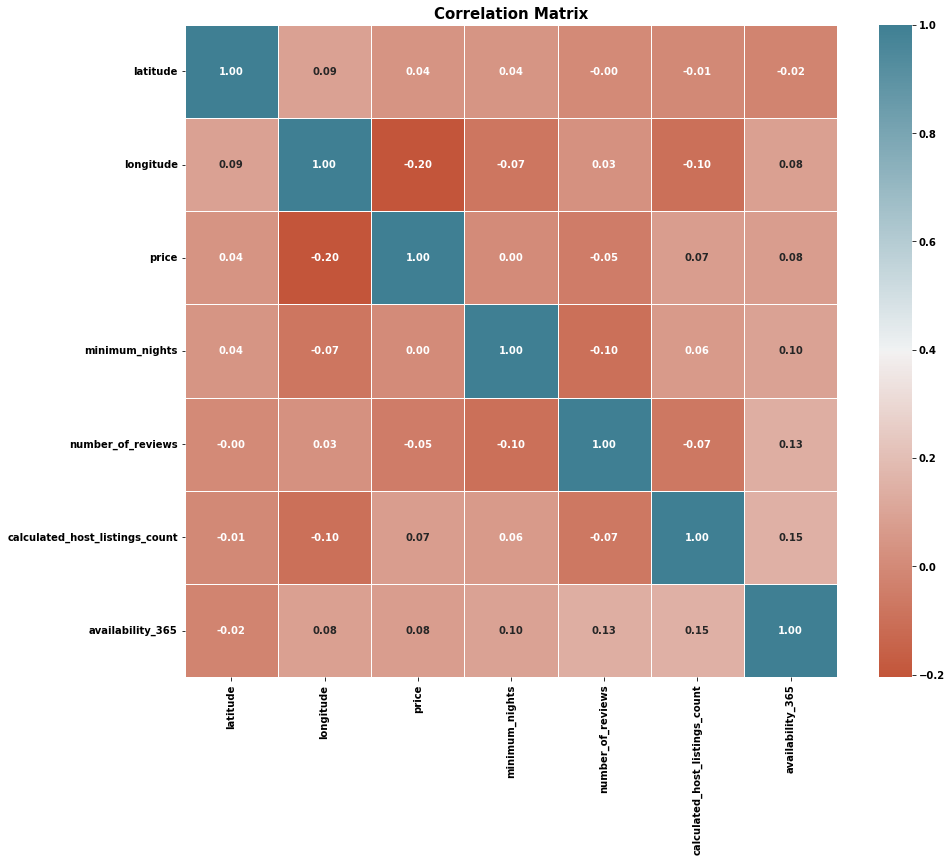

In [27]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

The correlation matrix shows that no feature strongly correlates to the price feature. The strongest correlation appears on the 'longitude' feature, where the correlation is negative. It means that the further west a listing is located, the lower the rental price will be.

Next, we will examine each numerical feature's data distribution and outliers. If the distribution is highly skewed, we can reduce the skewness by engineering each feature.

**Outliers Detection**

The number of outliers in the data will undoubtedly affect the analysis and modeling results. Several things must be considered before deciding on treatment in accordance with the data characteristics, including referring to the domain knowledge.

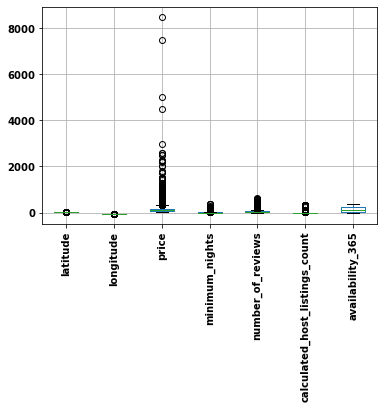

In [28]:
# Plotting a boxplot to check outliers
df_model.boxplot(rot=90);

There are a lot of outliers in some features. In this project, to create a cleaner dataset from outliers, I will do some data engineering on the features by considering the combination of the IQR method results and domain knowledge. Later, based on this' clean dataset', the resulting model can only predict new listings whose values are in the data range. Outside the data range, the prediction results from the model will be biased.

In [29]:
# Create a function to check outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    bound = iqr*1.5
    print(f'IQR: {iqr}')

    lower_bound = q1 - bound
    upper_bound = q3 + bound
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')        

In [30]:
# Outliers in the 'price' feature
find_anomalies(df_model['price'])

IQR: 101.0
Lower bound: -82.5
Upper bound: 321.5


In [31]:
# Outliers in the 'minimum_nights' feature
find_anomalies(df_model['minimum_nights'])

IQR: 3.0
Lower bound: -3.5
Upper bound: 8.5


In [32]:
# Outliers in the 'number_of_reviews' feature
find_anomalies(df_model['number_of_reviews'])

IQR: 45.0
Lower bound: -61.5
Upper bound: 118.5


In [33]:
# Outliers in the 'calculated_host_listings_count' feature
find_anomalies(df_model['calculated_host_listings_count'])

IQR: 1.0
Lower bound: -0.5
Upper bound: 3.5


In [34]:
# Outliers in the 'availability_365' feature
find_anomalies(df_model['availability_365'])

IQR: 249.0
Lower bound: -360.5
Upper bound: 635.5


Next, we can start to do feature engineering for each numerical feature.

**Price**

In [35]:
# Check descriptive stats of 'price' feature
df_model['price'].describe()

count    26559.000000
mean       140.270191
std        148.193300
min         10.000000
25%         69.000000
50%        104.000000
75%        170.000000
max       8500.000000
Name: price, dtype: float64

In [36]:
# Checking price > $321.5
df_model[df_model['price'] > 321.5].count()['price']

1446

We can see that 75% of the data in the price column is worth less than $170, while the maximum value is $8500. The data distribution is positively skewed. 

There are 1446 data whose price value is greater than $321.5 (the upper limit based on the IQR method). Therefore, data with a price exceeding $321.5 will not be included in the modeling, so the skewness will also be reduced. Consequently, the decision taken will be one of the limitations of the model that will be built.

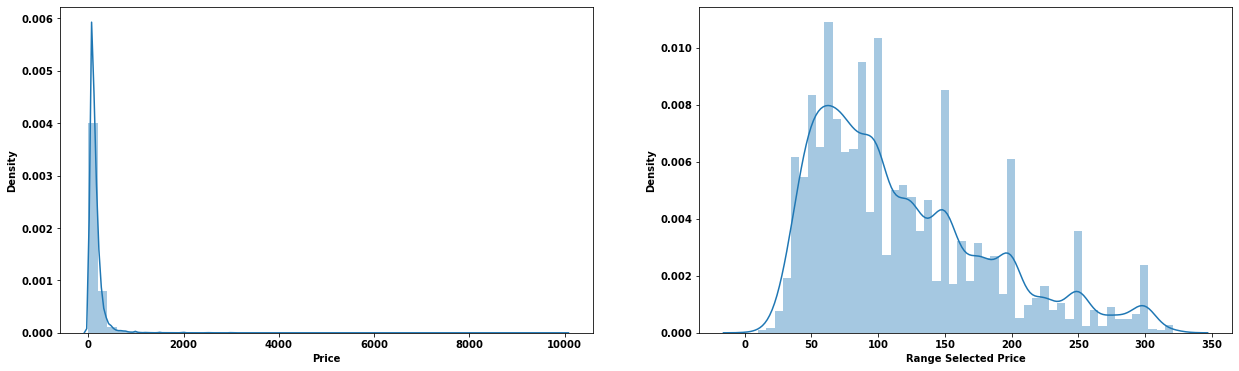

In [37]:
# Filtering the data
df_model = df_model[(df_model['price'] <= 321.5)]

# Plotting the data distribution before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(df_model['price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [38]:
# Check descriptive stats of 'price' feature after filtering
df_model['price'].describe()

count    25113.000000
mean       117.946482
std         65.244142
min         10.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        321.000000
Name: price, dtype: float64

**Minimum Nights**

Although the upper limit based on the IQR method for the 'minimum_nights' feature is 8.5, it turns out that the amount of data greater than 8.5 is quite a lot. If data greater than 8.5 is not included, it will eliminate essential information.

Therefore, it is assumed that the data used is data with a minimum reservation of no more than 30 days (taking a maximum of 30 days for one month), or in other words, not included in [long-term hosting](https://www.airbnb.com/help/article/1354/what-are-some-differences-between-longterm-hosting-and-shortterm-hosting). 

In the end, data whose value is greater than 30 will be dropped, so the skewness value for this feature will also decrease.


In [39]:
# Check descriptive stats of 'minimum_nights' feature
df_model['minimum_nights'].describe()

count    25113.000000
mean         5.057142
std         10.487733
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        365.000000
Name: minimum_nights, dtype: float64

In [40]:
# Check the number of minimum nights > 30
df_model[df_model['minimum_nights'] > 30].count()['minimum_nights']

215

In [41]:
# Filtering the data with minimum nights values not greater than 30
df_model = df_model[(df_model['minimum_nights'] <= 30)]

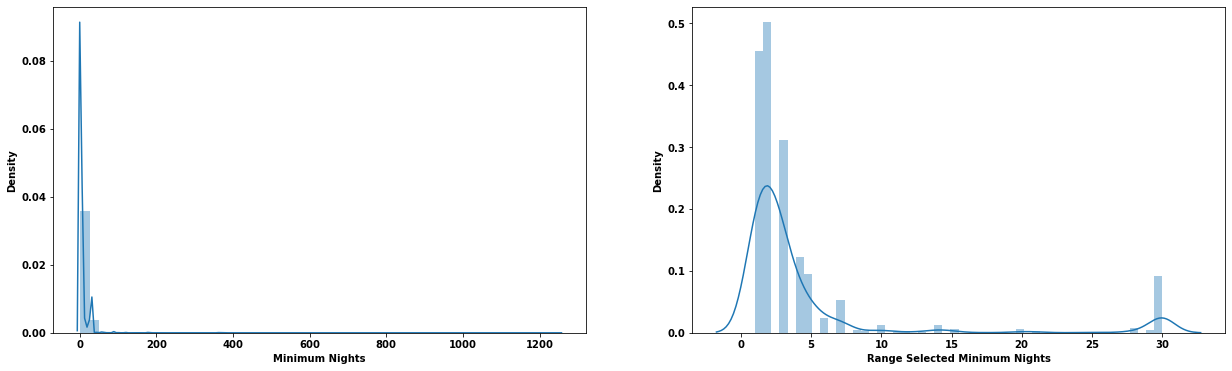

In [42]:
# Plotting data distribution before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['minimum_nights'], ax=axes[0])
sns.distplot(df_model['minimum_nights'], ax=axes[1])
axes[0].set_xlabel('Minimum Nights')
axes[1].set_xlabel('Range Selected Minimum Nights');

**Calculated Host Listings Count**

In [43]:
df_model['calculated_host_listings_count'].describe()

count    24898.000000
mean         4.933810
std         25.650943
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [44]:
# Check the number of hosts who have more than 10 listings
len(df_model[df_model['calculated_host_listings_count'] > 10])

1032

For the 'calculated_host_listings_count' feature, values greater than 10 will be dropped. 

It considers the upper limit value of the IQR method as well as the domain knowledge, where the upper limit value is 3.5. However, more data will be wasted if we take a threshold of 3.5 or 4. Therefore, we can decide to limit the data to hosts with a maximum of 10 listings. There are 1032 hosts with more than 10 listings.

In [45]:
# Filtering the data based on 'calculated_host_listings_count' feature
df_model = df_model[(df_model['calculated_host_listings_count'] <= 10)]

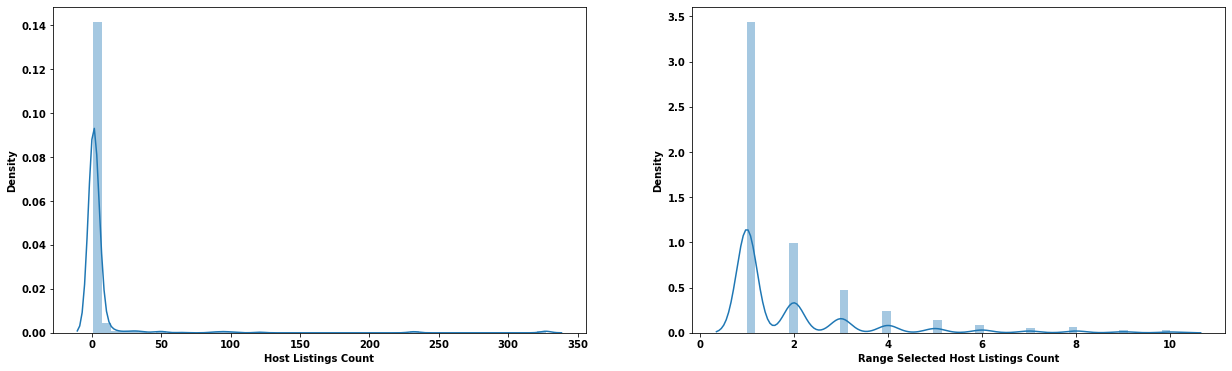

In [46]:
# Plotting data distribution before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['calculated_host_listings_count'], ax=axes[0])
sns.distplot(df_model['calculated_host_listings_count'], ax=axes[1])
axes[0].set_xlabel('Host Listings Count')
axes[1].set_xlabel('Range Selected Host Listings Count');

**Availability 365**

In [47]:
# Check descriptive stats of 'availability_365' feature
df_model['availability_365'].describe()

count    23866.000000
mean       131.515252
std        125.845570
min          0.000000
25%         10.000000
50%         88.000000
75%        248.000000
max        365.000000
Name: availability_365, dtype: float64

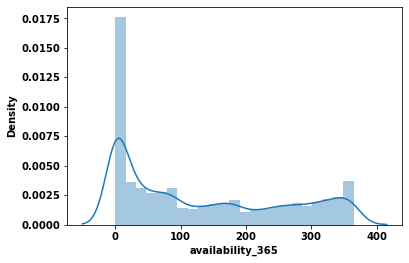

In [48]:
# Plotting data distribution of 'availability_365' feature
sns.distplot(df_model['availability_365']);

In [49]:
# Check the number of data with availability_365 = 0
df_model[df_model['availability_365'] == 0].count()['availability_365']

4190

There are 4190 records with a value of availability_365 = 0. It could be because many of these listings have been fully booked for one year. However, this feature is not relevant as input for a model that aims to predict the rental price of new property listings because the value of this feature is obtained when the listing is released. Therefore, this feature will not be included in the modeling.

Then, we will again drop the remaining features that are not needed for new listing price prediction modeling, which are 'availability_365', 'last_review', and 'number_of_reviews'.


In [50]:
# Drop 'availability_365' and 'last_review' features
df_model = df_model.drop(columns=['availability_365', 'last_review', 'number_of_reviews'], axis=1)

**Clean Dataset**

In [51]:
# Top 5 rows of clean dataset
df_model.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,1


In [52]:
# Recheck dataset information
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23866 entries, 0 to 48805
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             23866 non-null  object 
 1   neighbourhood                   23866 non-null  object 
 2   latitude                        23866 non-null  float64
 3   longitude                       23866 non-null  float64
 4   room_type                       23866 non-null  object 
 5   price                           23866 non-null  int64  
 6   minimum_nights                  23866 non-null  int64  
 7   calculated_host_listings_count  23866 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.6+ MB


Finally, the remaining 23866 rows of data will be used for modeling. 

More than 50% of the data has been eliminated according to the assumptions and arguments presented in the previous processes.

### **Modeling**

In [53]:
# Import libraries for modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

The categorical features must be converted to numerical features in order to use all the selected features. We can use ColumnTransformer to encode the categorical features, which can later be applied to the model pipeline.

In [54]:
# Encoding categorical features

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['neighbourhood_group', 'room_type']),
    ('Binary', ce.BinaryEncoder(), ['neighbourhood'])
], remainder='passthrough')

**Data Splitting**

In [55]:
# Splitting data into independent and dependent variables
X = df_model.drop(['price'], axis=1)
y = df_model['price']

**Train and Test Splitting**

In [56]:
# Splitting X and y into training and test sets with a 70:30 proportion
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

In [57]:
# Define the algorithms
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Modeling is done on a logarithmic scale, but the scale is inverted back afterward for interpretation
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Algorithms for the base model
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

# Finding the best algorithm based on metrics value
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

[-44.70659293 -47.5163147  -46.29069868 -45.74641634 -46.43214062] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-31.58027773 -33.37097059 -32.5284976  -32.43854092 -32.71535003] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.29900748 -0.30277051 -0.30254086 -0.30157807 -0.29879601] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-44.74817413 -47.77928787 -46.88841148 -46.07306954 -46.91381031] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-31.65637639 -33.22963286 -32.96482326 -32.88493879 -33.11774828] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.

In [58]:
# Evaluation of the algorithms' result
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-46.138433,0.917807,-32.526727,0.574782,-0.300939,0.001712
1,KNN Regressor,-46.480551,1.020583,-32.770704,0.569827,-0.302792,0.002289
2,DecisionTree Regressor,-60.454537,0.905148,-42.314500,0.469584,-0.396163,0.006982
3,RandomForest Regressor,-45.047499,1.006516,-31.386741,0.497088,-0.285054,0.001942
4,XGBoost Regressor,-44.494128,1.073594,-30.963333,0.621168,-0.283140,0.002083


There is a significant difference between the RMSE and MAE values, where the RMSE value is higher because the residuals or errors are squared before being averaged. RMSE will give a higher 'weight' for large error values. In other words, large error values are produced by all the algorithms used, so there is a significant difference between the RMSE and MAE values.

- Based on the RMSE value, XGBoost is the best model. Meanwhile, based on MAE and MAPE values, RandomForest produces the lowest error value.
- Next, predictions will be made on the test set with the two best benchmark models, XGBoost and RandomForest.


**Predict to Test Set with the Benchmark Model**

Predict to test set using XGBoost and Random Forest models.

In [70]:
# Benchmark models
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Predict to test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'RMSE': score_rmse, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,MAE,RMSE,MAPE
XGB,31.706818,44.164132,0.300005
RandomForest,32.160395,45.025395,0.299760


- When predicting the test set, XGBoost's cumulative performance is slightly better, as shown by the RMSE and MAE values which are slightly lower than RandomForest.

**Hyperparameter Tuning**

Since the XGBoost model performs slightly better than RandomForest, we will use this XGBoost model as the final model. At this step, we will perform hyperparameter tuning on the XGBoost model in the hope of improving the model's performance.

For a reference to tune the XGBoost model, you can refer to [XGBoost Tuning ](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [60]:
# Max depth
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# The number of trees
n_estimators = list(np.arange(100, 201))

# The number of rows of each tree (% of total rows in the training set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # The higher the value, the more conservative/simple the model

# The number of featuers used in each tree (% of total columns in the training set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # The higher the value, the more conservative/simple the model

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [61]:
# Redefine the benchmark model
xgb = XGBRegressor(random_state=1, verbosity=0)

# Define algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Can only choose one of the metrics for optimization
    random_state = 1  
)

In [62]:
# Fitting the training data training to find the most optimum parameters value
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['neighbourhood_group',
                                                                                'room_type']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['neighbourhood'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_sco...
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [63]:
# Check the tuning result in a DataFrame. Sorted by MAE, RMSE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,7.432603,0.378753,0.034583,0.005757,0.9,0.059948,119,8,0.05,5,...,0.431845,1,-0.302348,-0.302595,-0.301286,-0.301924,-0.296876,-0.301006,0.002112,1
17,6.088172,0.091197,0.034402,0.000802,0.6,0.001,190,5,0.04,9,...,0.416840,2,-0.305911,-0.306558,-0.304355,-0.304337,-0.301637,-0.304560,0.001700,2
24,3.090246,0.046527,0.030803,0.004749,0.9,10.0,146,4,0.06,5,...,0.487625,3,-0.309960,-0.314100,-0.313270,-0.310470,-0.310184,-0.311597,0.001732,5
22,2.817627,0.023982,0.031896,0.002279,0.7,0.002783,155,4,0.25,8,...,0.452027,4,-0.312418,-0.313707,-0.313692,-0.307704,-0.308107,-0.311126,0.002673,3
23,2.886615,0.141490,0.031801,0.002043,0.9,3.593814,153,4,0.33,9,...,0.458596,5,-0.314302,-0.315054,-0.310144,-0.310264,-0.306435,-0.311240,0.003136,4


In [64]:
# Check the best score and params
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -31.02206798789793
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Predict to test set with the XGBoost model and the best hyperparameter values.

In [65]:
# XGBoost model 
model = {'XGB': XGBRegressor(random_state=1)}

# Define the model with the best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting the model
xgb_tuning.fit(X_train, y_train)

# Predict to test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Keep the MAE, RMSE, MAPE values after tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'RMSE': rmse_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,RMSE,MAPE
XGB,30.952019,43.344829,0.290761


**Performance Comparison**

The performance comparison of the XGBoost model before and after hyperparameter tuning.

In [71]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,MAE,RMSE,MAPE
XGB,31.706818,44.164132,0.300005


In [67]:
# After hyperparameter tuning
score_after_tuning

,MAE,RMSE,MAPE
XGB,30.952019,43.344829,0.290761


The model has performance improvement with hyperparameter tuning, although only slightly.

As we can see through the value of the metrics (reduced MAE, RMSE & MAPE values).

- MAE, RMSE & MAPE before tuning: 31.70, 44.16, 0.300
- MAE, RMSE & MAPE after tuning: 30.97, 43.34, 0.290

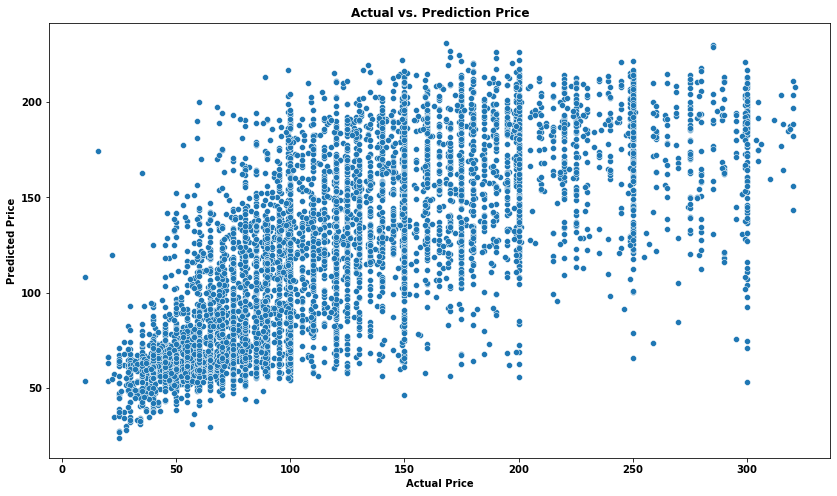

In [68]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Large error values make a significant difference between the RMSE and MAE values. It can also be illustrated in the plot above, where the actual price is low but predicted to be much higher (over-estimation) and vice versa (under-estimation). However, the MAPE value of around 29% makes this model can be categorized as 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

To find out which features affect the target (price), we can check it through the feature_importances_ function.

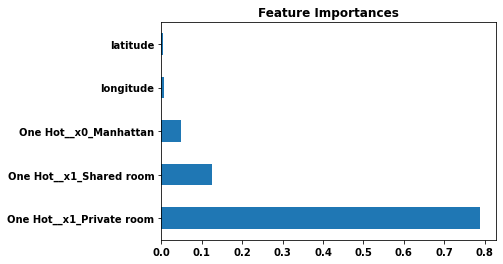

In [69]:
# Plotting feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Types of rooms (private and shared) and location (neighborhood, longitude, and latitude) are the top 5 important features.

### **Conclusion**

According to the modeling that has been done, the 'room_type' and 'neighbourhood_group' features are the most influential features on 'price'.

The evaluation metrics used are RMSE, MAE & MAPE. Let's look at the MAPE value produced by the model after hyperparameter tuning, which is ~29%. We can conclude that when our model estimates new listing prices in New York City in the range of values trained on the model (the maximum price is USD 321), the estimated average price will be missed by about 29% of the actual price.

However, it is also possible that the prediction will miss even further because the bias produced by the model is still relatively high when seen from the visualization between the actual and predicted prices. The bias generated by this model is due to the limited features in the dataset that can represent aspects of property and services, such as the number of rooms, building area, the presence of free meals, towels, and others.

Indeed, this model can still be improved to produce better predictions. Nevertheless, we can do A/B testing on the model that has been built in this project to determine the effectiveness of using the model in increasing the number of listings rented out. Later, from the results of A/B testing, we can get other insights regarding what can and should be improved on the model.


### **Recommendations**

    Perform A/B testing to test the model's effectiveness on listings rented out rate compared to the hosts who set the listing rental price themselves.

Then, things that can be done to develop the model to be better, such as:

1. Check which predictions have a high error value. We can group these errors into over-estimation and under-estimation groups, then choose only the most extreme 5% errors for each group. Later, the grouping will be divided into 3 groups, which are over-estimation (5%), under-estimation (5%), and the majority group whose error is close to the mean value (90%). After that, we can check the relationship between the error and each independent variable. Ultimately, we can determine which variables and aspects cause the model to produce high errors and retrain the model with other feature engineering methods.
<br><br>
2. If possible, add features that correlate more with the target ('price'), such as room size or distance to the city center. Besides, the addition of the latest data for New York Airbnb will undoubtedly be able to improve the predictive capacity of the model.
<br><br>
3. If you add a lot of data, you can try using a more complex model, such as recursive neural networks (RNN). However, if the amount of data and features are still like this dataset, it will most likely not change the results significantly.
<br><br>
4. The model that has been built can be used for the development of other models. For example, to create a model to predict listing price updates for listings that already have reviews. Original data released from Airbnb (not taken from Kaggle) can be used for modeling with this purpose, which may have a 'review' column from customers. 

    If so, we can perform sentiment analysis to get insight from the customer review. Each review can be assigned to -1 (for negative sentiment) and 1 (for positive sentiment). Then, the review value obtained for each of the same listings will be averaged, so the final value for each listing can later be used as a feature in the model. In the end, the predictive ability of the model may be better.


****

#### **Save Model**

In [ ]:
# Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_Airbnb_XGB.sav', 'wb'))

In [ ]:
# Load model
# filename = 'Model_Airbnb_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))